In [ ]:
!pip install finance-datareader

In [1]:
import FinanceDataReader as fdr

company = '005930'

stock = fdr.DataReader(company , '2020-01-01' , '2023-11-27')
print(stock)

ModuleNotFoundError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()

stock.iloc[:,:5] = scaler.fit_transform(stock.iloc[:,:5])

In [ ]:
stock

,Open,High,Low,Close,Volume,Change,Close2
Date,,,,,,,
2020-01-02,-0.467123,-0.527379,-0.496353,-0.534222,-0.768667,0.006376,94700
2020-01-03,-0.439829,-0.435663,-0.485201,-0.545182,-0.402604,-0.002112,94500
2020-01-06,-0.630883,-0.575934,-0.568838,-0.556143,-0.641761,-0.002116,94300
2020-01-07,-0.549003,-0.570539,-0.501929,-0.572583,-0.689259,-0.003181,94000
2020-01-08,-0.445288,-0.349342,-0.435020,-0.386258,1.749320,0.036170,97400
...,...,...,...,...,...,...,...
2023-11-21,1.498007,1.474185,1.594559,1.509878,-0.716269,0.004566,132000
2023-11-22,1.366998,1.382469,1.477468,1.471517,-0.883719,-0.005303,131300
2023-11-23,1.421585,1.371679,1.477468,1.405755,-1.039481,-0.009139,130100


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [ ]:
stock.drop('Change' , axis = 1, inplace = True)

In [ ]:
stock['Close2'] = stock['Close']

In [ ]:
stock

,Open,High,Low,Close,Volume,Close2
Date,,,,,,
2020-01-02,-0.467123,-0.527379,-0.496353,-0.534222,-0.768667,94700
2020-01-03,-0.439829,-0.435663,-0.485201,-0.545182,-0.402604,94500
2020-01-06,-0.630883,-0.575934,-0.568838,-0.556143,-0.641761,94300
2020-01-07,-0.549003,-0.570539,-0.501929,-0.572583,-0.689259,94000
2020-01-08,-0.445288,-0.349342,-0.435020,-0.386258,1.749320,97400
...,...,...,...,...,...,...
2023-11-21,1.498007,1.474185,1.594559,1.509878,-0.716269,132000
2023-11-22,1.366998,1.382469,1.477468,1.471517,-0.883719,131300
2023-11-23,1.421585,1.371679,1.477468,1.405755,-1.039481,130100


In [ ]:
window_size = 20
x = []
y = []

for i in range(len(stock) - window_size):
  temp = stock.iloc[i:i+window_size , :5]
  x.append(temp)
  temp1 = stock.iloc[i+window_size , 5]
  y.append(temp1)


x = np.array(x)
y = np.array(y)


print(x.shape , y.shape)

(945, 20, 5) (945,)


In [ ]:
x[0]

array([[-1.13517397, -1.14012649, -1.1272846 , -1.16209908, -0.53250371],
       [-1.0850668 , -1.08017706, -1.13734038, -1.13198319, -0.23450521],
       [-1.19530257, -1.18009279, -1.16750773, -1.13198319, -0.86549732],
       [-1.1151311 , -1.1001602 , -1.06694989, -1.10186729, -0.89852007],
       [-1.06502394, -1.00024447, -1.03678254, -1.00148097,  0.7566344 ],
       [-0.8445524 , -0.8803456 , -0.88594579, -0.8207856 ,  0.83041649],
       [-0.80446667, -0.77043829, -0.79544374, -0.73043791, -0.16360529],
       [-0.7242952 , -0.74046357, -0.71499747, -0.68024475, -0.73297743],
       [-0.64412373, -0.64054784, -0.6345512 , -0.68024475, -0.05243984],
       [-0.73431664, -0.78042986, -0.73510904, -0.78063107, -0.37207213],
       [-0.77440237, -0.67052256, -0.72505325, -0.60997433, -0.36215376],
       [-0.49380223, -0.54063211, -0.52393758, -0.54974253, -0.160478  ],
       [-0.4837808 , -0.46069953, -0.4535471 , -0.43931758, -0.58947403],
       [-0.4837808 , -0.50066582, -0.5

In [ ]:
y[0]

57200

In [ ]:
begin_2023 = stock.index.get_loc('2023-01-02')
begin_2023

742

In [ ]:
split_point = begin_2023 - window_size

In [ ]:
x_train = x[:split_point]
y_train = y[:split_point]

x_test = x[split_point:]
y_test = y[split_point:]

print(x_train.shape , y_train.shape)

(722, 20, 5) (722,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size = 0.2 , shuffle = True)

In [ ]:
print(x_train.shape , y_train.shape , '\n' , x_val.shape , y_val.shape , '\n' , x_test.shape , y_test.shape)

(577, 20, 5) (577,) 
 (145, 20, 5) (145,) 
 (223, 20, 5) (223,)


In [ ]:
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import LSTM , Dense , Dropout , Flatten
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

In [ ]:
mc = ModelCheckpoint('stock1.h5' , monitor = 'val_mae' , save_best_only = True , verbose = 1)
ea = EarlyStopping(monitor = 'val_loss' , mode = 'min' , verbose = 1 , patience = 100)

In [ ]:
model = Sequential()
model.add(LSTM(32 , activation = 'tanh' , input_shape = (x_train.shape[1] , x_train.shape[2])))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mae' , optimizer = 'adam' , metrics = 'mae')


In [ ]:
history = model.fit(x_train , y_train , epochs = 2000 , callbacks = [mc , ea] , validation_data = (x_val , y_val))

Epoch 1/2000
11/19 [================>.............] - ETA: 0s - loss: 67252.1172 - mae: 67252.1172 
Epoch 1: val_mae improved from inf to 66429.10938, saving model to stock1.h5
19/19 [==============================] - 3s 33ms/step - loss: 67111.8984 - mae: 67111.8984 - val_loss: 66429.1094 - val_mae: 66429.1094
Epoch 2/2000
12/19 [=================>............] - ETA: 0s - loss: 67127.2969 - mae: 67127.2969
Epoch 2: val_mae improved from 66429.10938 to 66426.40625, saving model to stock1.h5
19/19 [==============================] - 0s 9ms/step - loss: 67110.0625 - mae: 67110.0625 - val_loss: 66426.4062 - val_mae: 66426.4062
Epoch 3/2000
 1/19 [>.............................] - ETA: 0s - loss: 68383.3906 - mae: 68383.3906

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/19 [================>.............] - ETA: 0s - loss: 67277.7031 - mae: 67277.7031
Epoch 3: val_mae improved from 66426.40625 to 66422.25000, saving model to stock1.h5
19/19 [==============================] - 0s 8ms/step - loss: 67106.7891 - mae: 67106.7891 - val_loss: 66422.2500 - val_mae: 66422.2500
Epoch 4/2000
11/19 [================>.............] - ETA: 0s - loss: 67631.3672 - mae: 67631.3672
Epoch 4: val_mae improved from 66422.25000 to 66417.10156, saving model to stock1.h5
19/19 [==============================] - 0s 9ms/step - loss: 67102.4297 - mae: 67102.4297 - val_loss: 66417.1016 - val_mae: 66417.1016
Epoch 5/2000
12/19 [=================>............] - ETA: 0s - loss: 67068.2109 - mae: 67068.2109
Epoch 5: val_mae improved from 66417.10156 to 66410.84375, saving model to stock1.h5
19/19 [==============================] - 0s 8ms/step - loss: 67097.1094 - mae: 67097.1094 - val_loss: 66410.8438 - val_mae: 66410.8438
Epoch 6/2000
17/19 [=========================>....] - ET

In [ ]:
model = load_model('stock1.h5')

In [ ]:
score = model.evaluate(x_test , y_test , verbose = 0)
print('test loss : ' , score[0])
print(score[1])

7/7 [==============================] - 0s 3ms/step


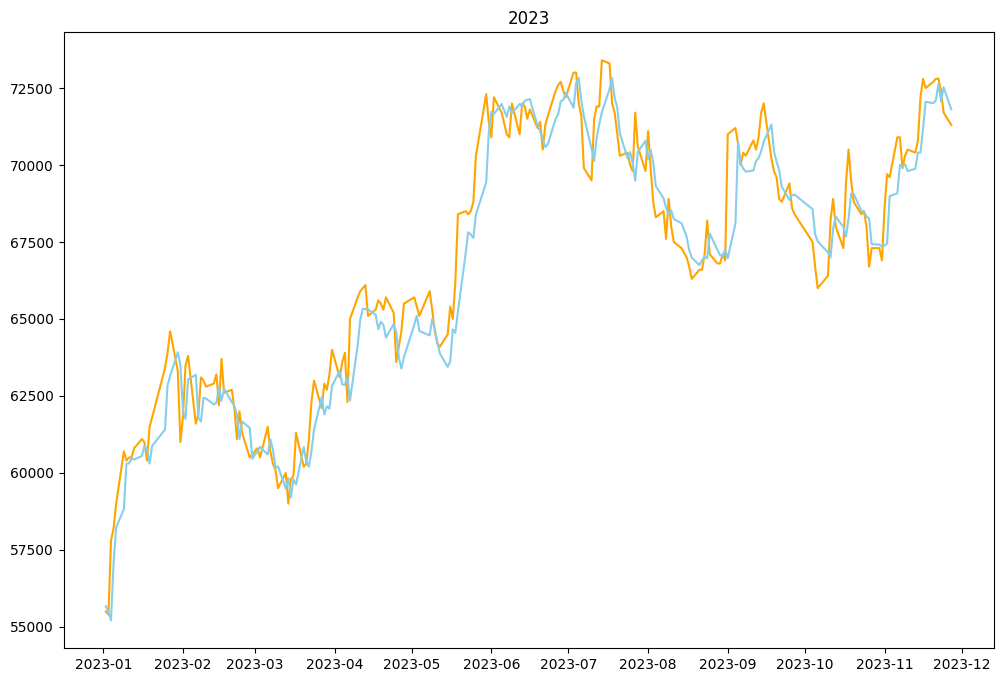

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
days_2023 = stock.index[stock.index >= '2023-01-02']

plt.figure(figsize = (12,8))
plt.title('2023')
plt.plot(days_2023 , y_test , 'orange' , label = 'truth')
plt.plot(days_2023 , y_pred , 'skyblue' , label = 'prediction')